In [1]:
## neural network to classify garbage
##
##

In [2]:
# calculate and plot
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# images
import cv2
import glob

In [4]:
## test tensorflow on M1
import tensorflow as tf

# GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# # version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.0


In [26]:
# data path
cb_path      = 'garbage_data/cardboard/*'
glass_path   = 'garbage_data/glass/*'
metal_path   = 'garbage_data/metal/*'
paper_path   = 'garbage_data/paper/*'
plastic_path = 'garbage_data/plastic/*'
trash_path   = 'garbage_data/trash/*'

def resize_image(image):
    dim = (320, 320)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

def read_image(path):
    return cv2.imread(path);

def read_images(dir):
    images = [resize_image(read_image(file)) for file in glob.glob(dir)]
    return images

def image_to_bw(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, image_bw) = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
    return image_bw

def images_to_bw(images):
    images_bw = [image_to_bw(image) for image in images]
    return images_bw

amount of cardboard images read:  403
example image shape:  (320, 320, 3)
image example: 


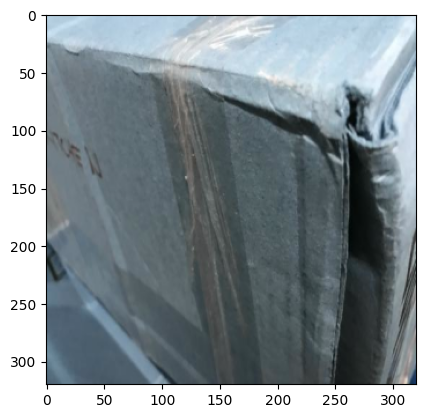

In [27]:
cb_images = read_images(cb_path)

print('amount of cardboard images read: ', len(cb_images))

example = cb_images[0]
print('example image shape: ', example.shape)
print('image example: ')

plt.imshow(example)
plt.show()

shape of bw example:  (320, 320)
bw image example: 


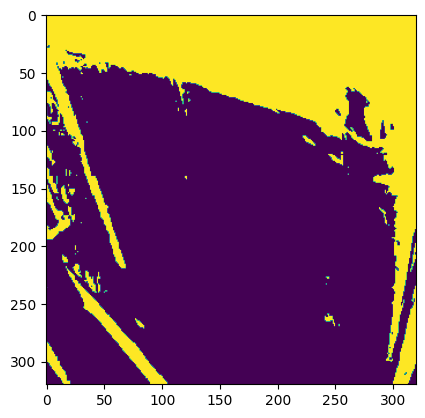

In [28]:
example_bw = image_to_bw(example)
print('shape of bw example: ', example_bw.shape)
print('bw image example: ')

plt.imshow(example_bw)
plt.show()

In [66]:
print('image as np array:')
print(example_bw)

# lets normalize example:

M = example_bw
M_normalized = M / M.max()

print('image normalized as np array:')
print(M_normalized)

def normalize(M):
    return M / M.max()

## steps to preprocess data : 
#
# 1 - read data + create Y
# 2 - to bw
# 3 - enrich
# 4 - normalize
# 5 - randomize
# 6 - split

image as np array:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
image normalized as np array:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
# read all other images
glass_images   = read_images(glass_path)
metal_images   = read_images(metal_path)
paper_images   = read_images(paper_path)
plastic_images = read_images(plastic_path)
trash_images   = read_images(trash_path)

print('amount of cardboard images read: ', len(cb_images))
print('amount of glass images read: ', len(glass_images))
print('amount of metal images read: ', len(metal_images))
print('amount of paper images read: ', len(paper_images))
print('amount of plastic images read: ', len(plastic_images))
print('amount of trash images read: ', len(trash_images))

# parse to bw
cb_images_bw      = images_to_bw(cb_images)
glass_images_bw   = images_to_bw(glass_images)
metal_images_bw   = images_to_bw(metal_images)
paper_images_bw   = images_to_bw(paper_images)
plastic_images_bw = images_to_bw(plastic_images)
trash_images_bw   = images_to_bw(trash_images)

print('example cardboard image shape: ', cb_images_bw[0].shape)
print('example glass image shape: ', glass_images_bw[0].shape)
print('example metal image shape: ', metal_images_bw[0].shape)
print('example paper image shape: ', paper_images_bw[0].shape)
print('example plastic image shape: ', plastic_images_bw[0].shape)
print('example trash image shape: ', trash_images_bw[0].shape)

amount of cardboard images read:  403
amount of glass images read:  501
amount of metal images read:  410
amount of paper images read:  594
amount of plastic images read:  482
amount of trash images read:  137
example cardboard image shape:  (320, 320)
example glass image shape:  (320, 320)
example metal image shape:  (320, 320)
example paper image shape:  (320, 320)
example plastic image shape:  (320, 320)
example trash image shape:  (320, 320)


In [42]:
y_cb_s = np.zeros(6)
y_cb_s[0] = 1

y_glass_s = np.zeros(6)
y_glass_s[1] = 1

y_metal_s = np.zeros(6)
y_metal_s[2] = 1

y_paper_s = np.zeros(6)
y_paper_s[3] = 1

y_plastic_s = np.zeros(6)
y_plastic_s[4] = 1

y_trash_s = np.zeros(6)
y_trash_s[5] = 1

y_cb = np.array([y_cb_s for i in range(len(cb_images_bw))])
y_glass = np.array([y_glass_s for i in range(len(glass_images_bw))])
y_metal = np.array([y_metal_s for i in range(len(metal_images_bw))])
y_paper = np.array([y_paper_s for i in range(len(paper_images_bw))])
y_plastic = np.array([y_plastic_s for i in range(len(plastic_images_bw))])
y_trash = np.array([y_trash_s for i in range(len(trash_images_bw))])

In [54]:
cb_data = np.array(cb_images_bw)
glass_data = np.array(glass_images_bw)
metal_data = np.array(metal_images_bw)
paper_data = np.array(paper_images_bw)
plastic_data = np.array(plastic_images_bw)
trash_data = np.array(trash_images_bw)

In [59]:
x_total_set = np.concatenate((cb_data, glass_data), axis = 0)
x_total_set = np.concatenate((x_total_set, metal_data), axis = 0)
x_total_set = np.concatenate((x_total_set, paper_data), axis = 0)
x_total_set = np.concatenate((x_total_set, plastic_data), axis = 0)
x_total_set = np.concatenate((x_total_set, trash_data), axis = 0)

y_total_set = np.concatenate((y_cb, y_glass), axis = 0)
y_total_set = np.concatenate((y_total_set, y_metal), axis = 0)
y_total_set = np.concatenate((y_total_set, y_paper), axis = 0)
y_total_set = np.concatenate((y_total_set, y_plastic), axis = 0)
y_total_set = np.concatenate((y_total_set, y_trash), axis = 0)

print("total x examples: ", x_total_set.shape[0])
print("total y examples: ", y_total_set.shape[0])

total x examples:  2527
total y examples:  2527


In [67]:
from sklearn.model_selection import train_test_split

X = normalize(x_total_set)
y = y_total_set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0.

In [80]:
model = tf.keras.Sequential(
    layers=[tf.keras.layers.InputLayer(input_shape=(320, 320)),
            tf.keras.layers.Convolution2D(activation="relu", kernel_size=(16, 16), filters=320),
            tf.keras.layers.Dense(units=320, activation="relu"),
            tf.keras.layers.Dense(units=160, activation="relu"),
            tf.keras.layers.Dense(units=6, activation="linear"),
    ]
)

model.build()
model.summary()

ValueError: Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 320, 320)